In [73]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

from sklearn.linear_model import LinearRegression

### Dark theme pour matplotlib ###
from ing_theme_matplotlib import mpl_style

### Perso ###
from methods import *
# from methods import extract_in_margin

### Import du theme sombre pour matplotlib


In [74]:
mpl_style(dark=True)

In [75]:


X=np.array(
    [[5.,23.,34.,35,3],
    [22,71,0,3,0],
    [3,42,27,26,2],
    [1,7,31,59,2],
    [3,23,33,29,12],
    
    ]
)
X2=np.array(
    [[3.,21.,32.,39,5],
    [12,60,21,5,2],
    [3,42,24,28,3],
    [1,9,25,60,5],
    [2,21,34,28,15],
    ]
)
y=np.array([6.,28,29,31,6,4.,26,30,32,8])
X_all=np.concatenate((X.T,X2.T),axis=0)
lr = LinearRegression().fit(X_all, y)
print(np.dot(X_all,lr.coef_))
print(lr.coef_*1000)
lr.intercept_


X=np.array(
    [[10.,3.,2.,4,2],
    [24,26,25,22,33],
    [33,31,29,31,28],
    [19,27,37,35,32],
    [14,13,7,8,5],
    [11,5,5,6,4],
    [26,28,25,30,30],
    [35,37,27,26,27],
    [19,23,37,33,33],
    [9,7,6,5,4],
    ]
)
y=np.array([4.,26,30,32,8,6.,28,29,31,6])
lr = LinearRegression().fit(X, y)
# print(np.sum(X[:,0]*lr.coef_.T))
print(lr.coef_*1000)


[ 5.34734882 27.54798694 28.39977844 30.09763167  5.35240545  3.30612863
 25.25725284 29.25954606 31.70866098  7.60909243]
[364.03181672  98.8824073   97.30961153  86.85049071 324.33248316]
[144.69231815  89.3489229  261.25395915 269.38311787 234.62420026]


# Méthode pour le calcul des erreurs
Pour l'étude des variations il serait plus juste de définir la distance entre les deux courbes de répartition qui induirait un chance d'inversion des valeurs dans moins de 5% des cas.

0.049749

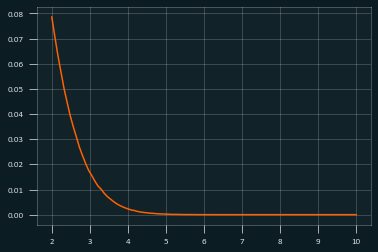

In [76]:
def sample_norm(mean1=0,std1=1,mean2=0,std2=1,size=1000000):
    a=np.random.normal(mean1, std1, size)
    b=np.random.normal(mean2, std2, size)
    return np.sum(a>b)/size

std=1
x = np.linspace(2, 10, 100)
y = [sample_norm(0,std,v,std,size=1000000) for v in x]
plt.plot(x,y)
sample_norm(0,std,std*2.328,std,size=1000000)

Une simulation monte carlo nous donne une valeur approximé à **2.328**. Il conviendrait d'utiliser cette valeur pour les études de variations. Das ce cas la marge d'erreur devrait être $$\frac{2.328}{2}\sigma=1.164\sigma$$

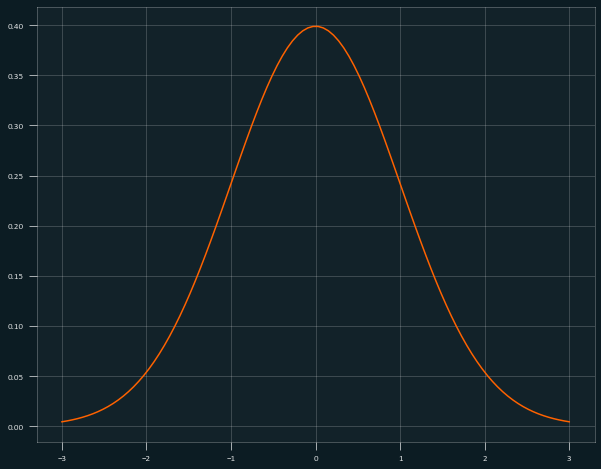

In [77]:
def draw_norm_err(m=0,std=1,err=0.95,xmin=0,xmax=7,draw_err=True):
    Za_min=norm.ppf(1-err,loc=m,scale=std)
    Za_max=norm.ppf(err,loc=m,scale=std)
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x,m,std)
    if draw_err:
        xerr = np.linspace(Za_min, Za_max, 100)
        yerr = norm.pdf(xerr,m,std)
        plt.fill_between(xerr, yerr,alpha=0.2)
    plt.plot(x,y)


plt.figure(figsize=(10,8))
xmin,xmax=0,7
std=1
m=2
err=0.95
# draw_norm_err(m,std,err,xmin,xmax)
# draw_norm_err(m+2,std,err,xmin,xmax)
draw_norm_err(0,std,err,-3,3,False)
# plt.savefig('loi_normale.png')


C:\Users\Romain\AppData\Local\pypoetry\Cache\virtualenvs\mesure-instituts-sondage-z_i9feTs-py3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


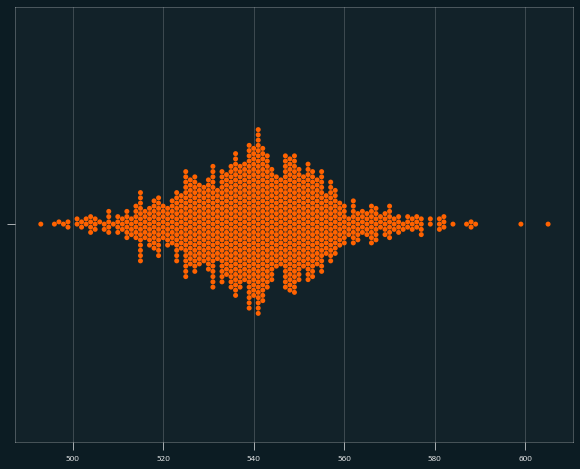

In [78]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([0,1],(1000,1000),p=[0.46,0.54]).sum(axis=0)
# draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('femmes.png')

# Load all dataframes



## Load method

## Load Ipsos


In [79]:
ipsos=load_data('ipsos/data')
ipsos['Categorie']=ipsos['Categorie'].str.replace(' ','')
ipsos['Groupe']=ipsos['Groupe'].str.replace(' ','')
ipsos['Groupe']=ipsos['Groupe'].str.replace('xpr.','xpr')

C:\Users\Romain\AppData\Local\pypoetry\Cache\virtualenvs\mesure-instituts-sondage-z_i9feTs-py3.9\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Romain\AppData\Local\pypoetry\Cache\virtualenvs\mesure-instituts-sondage-z_i9feTs-py3.9\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Romain\AppData\Local\pypoetry\Cache\virtualenvs\mesure-instituts-sondage-z_i9feTs-py3.9\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Romain\AppData\Local\pypoetry\Cache\virtualenvs\mesure-instituts-sondage-z_i9feTs-py3.9\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users

In [80]:
ipsos.head()

,Nom,Categorie,Groupe,Base,Date,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,971.0,2018-12-08,3.2,16.4,19.6,26.2,49.8,76.0,4.4,-6.4,5.7
1,Emmanuel MACRON,Sexe,Homme,462.0,2018-12-08,3.0,16.3,19.2,31.9,46.3,78.3,2.5,-12.1,11.4
2,Emmanuel MACRON,Sexe,Femme,509.0,2018-12-08,3.5,16.5,20.0,20.9,53.0,74.0,6.0,-1.2,0.5
3,Emmanuel MACRON,Age,18à24ans,103.0,2018-12-08,12.0,18.5,30.5,26.8,32.5,59.3,10.2,-0.3,-5.4
4,Emmanuel MACRON,Age,25à34ans,154.0,2018-12-08,1.8,11.2,13.1,23.9,57.1,81.0,6.0,-10.1,9.5


## Load Ifop


In [81]:
ifop=load_data('ifop/data')
ifop.head()

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1928.0,5.0,22.0,27.0,32.0,40.0,72.0,1.0,4.0,-4.0,2019-01-19
1,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1928.0,4.0,26.0,30.0,36.0,31.0,67.0,3.0,-1.0,1.0,2019-01-19
2,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1891.0,5.0,23.0,28.0,34.0,37.0,71.0,1.0,1.0,-1.0,2019-02-16
3,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1891.0,3.0,28.0,31.0,36.0,30.0,66.0,3.0,1.0,-1.0,2019-02-16
4,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1929.0,4.0,25.0,29.0,36.0,33.0,69.0,2.0,1.0,-2.0,2019-03-23


## Load Ifop personalités

In [82]:
ifop_pers=load_data_perso('ifop/data_perso',{'Opinion positive':'ST Favorable'})
ifop_pers.head()

,Nom,Base,Date,ST Favorable
0,Nicolas HULOT,1008.0,2020-01-11,72.0
1,Martine AUBRY,1008.0,2020-01-11,45.0
2,Nicolas SARKOZY,1008.0,2020-01-11,44.0
3,Edouard PHILIPPE,1008.0,2020-01-11,44.0
4,Ségolène ROYAL,1008.0,2020-01-11,44.0


## Load ELABE


In [83]:
elabe=load_data('elabe/data',{'tres_positif':'Très favorable','positif':'Plutôt favorable','negatif':'Plutôt défavorable','tres_negatif':'Très défavorable', 'nsp':'Nsp',	'total_positif':'ST Favorable',	'total_negatif':'ST Défavorable'},False)
elabe.head()

,Nom,Base,Date,Categorie,Groupe,Très favorable,Plutôt favorable,Plutôt défavorable,Très défavorable,Nsp,ST Favorable,ST Défavorable
0,Emmanuel MACRON,1006,2020-01-15,Ensemble,Ensemble,8.0,24.0,24.0,39.0,5.0,32.0,63.0
1,Emmanuel MACRON,402,2020-01-15,SEXE DU REPONDANT,Homme,10.0,23.0,22.0,41.0,4.0,33.0,63.0
2,Emmanuel MACRON,604,2020-01-15,SEXE DU REPONDANT,Femme,6.0,25.0,25.0,38.0,6.0,31.0,63.0
3,Emmanuel MACRON,84,2020-01-15,AGE DU REPONDANT,18-24 ans,7.0,23.0,24.0,36.0,10.0,30.0,60.0
4,Emmanuel MACRON,134,2020-01-15,AGE DU REPONDANT,25-34 ans,12.0,21.0,18.0,44.0,5.0,33.0,62.0


## Load ELABE Personnalités

In [84]:
elabe_pers=load_data_perso('elabe/data_perso',{'tres_positif':'Très favorable','positif':'Plutôt favorable','negatif':'Plutôt défavorable','tres_negatif':'Très défavorable', 'nsp':'Nsp',	'total_positif':'ST Favorable',	'total_negatif':'ST Défavorable','evolution_positif':'Evolution ST Favorable'})
elabe_pers.head()

,Nom,Base,Date,Categorie,Groupe,Très favorable,Plutôt favorable,Plutôt défavorable,Très défavorable,Nsp,ST Favorable,ST Défavorable,Evolution ST Favorable
0,Nicolas HULOT,1006.0,2020-01-15,Ensemble,Ensemble,12.0,35.0,18.0,16.0,19.0,47.0,34.0,-5.0
1,Nicolas SARKOZY,1006.0,2020-01-15,Ensemble,Ensemble,8.0,24.0,27.0,28.0,13.0,32.0,55.0,-1.0
2,Jean-Yves LE,1006.0,2020-01-15,Ensemble,Ensemble,7.0,23.0,17.0,18.0,35.0,30.0,35.0,0.0
3,Xavier BERTRAND,1006.0,2020-01-15,Ensemble,Ensemble,6.0,24.0,21.0,18.0,31.0,30.0,39.0,1.0
4,François BAROIN,1006.0,2020-01-15,Ensemble,Ensemble,5.0,23.0,20.0,17.0,35.0,28.0,37.0,-1.0


# Comparaison des résultats des instituts de sondages 
## Calcul des erreurs théoriques


In [85]:
def compute_error(df,col):
    return error_p(df[col]/100,df.Base)*100

### Ajout des erreurs sur les mesures

In [86]:
#IPSOS
ipsos['Erreur ST Fav']=compute_error(ipsos,'ST Favorable')
ipsos['Erreur ST Defav']=compute_error(ipsos,'ST Défavorable')
ipsos['Erreur PDefav']=compute_error(ipsos,'Plutôt défavorable')
ipsos['Erreur TDefav']=compute_error(ipsos,'Très défavorable')
ipsos['Erreur Nsp']=compute_error(ipsos,'Nsp')
#IFOP
ifop['Erreur ST Fav']=compute_error(ifop,'ST Favorable')
ifop['Erreur ST Defav']=compute_error(ifop,'ST Défavorable')
ifop['Erreur Nsp']=compute_error(ifop,'Nsp')
ifop_pers['Erreur ST Fav']=compute_error(ifop_pers,'ST Favorable')
#ELABE
elabe['Erreur ST Fav']=compute_error(elabe,'ST Favorable')
elabe['Erreur ST Defav']=compute_error(elabe,'ST Défavorable')
elabe['Erreur PDefav']=compute_error(elabe,'Plutôt défavorable')
elabe['Erreur TDefav']=compute_error(elabe,'Très défavorable')
elabe['Erreur Nsp']=compute_error(elabe,'Nsp')
elabe_pers['Erreur ST Fav']=compute_error(elabe_pers,'ST Favorable')
elabe_pers['Erreur ST Defav']=compute_error(elabe_pers,'ST Défavorable')
elabe_pers['Erreur PDefav']=compute_error(elabe_pers,'Plutôt défavorable')
elabe_pers['Erreur TDefav']=compute_error(elabe_pers,'Très défavorable')
elabe_pers['Erreur Nsp']=compute_error(elabe_pers,'Nsp')


# Différence de popularité du président et des premiers ministres

Les jeux de données IFOP contiennent très peu de personnes (président et premiers ministres)

In [87]:
noms_en_commun=[x for x in ifop.Nom.unique() if x in ipsos.Nom.unique()]

In [88]:
def one_plot(df,nom,col,err_col):
    data=df[df.Nom==nom]
    sns.lineplot(x='Date',y=col,data=data)
    plt.fill_between(x=data.Date,\
        y1=data[col]-data[err_col],\
        y2=data[col]+data[err_col],\
            alpha=0.25)

def plot_with_error(list_dfs,liste_noms,col,err_col,labels=['df1','df2']):
    for nom in liste_noms:
        plt.figure(figsize=(10,8))
        for df in list_dfs:
            one_plot(df,nom,col,err_col)
        plt.legend(labels=labels)
        plt.title(nom)
        
def plot_onedf_with_error(df1,liste_noms,col,err_col,labels=['df1','df2']):
    plt.figure(figsize=(10,8))
    for nom in liste_noms:
        data=df1[df1.Nom==nom]
        sns.lineplot(x='Date',y=col,data=data)
        plt.fill_between(x=data.Date,\
            y1=data[col]-data[err_col],\
            y2=data[col]+data[err_col],\
                alpha=0.25)
    plt.legend(labels=labels)

In [89]:
elabe[elabe.Nom=='Emmanuel MACRON']

,Nom,Base,Date,Categorie,Groupe,Très favorable,Plutôt favorable,Plutôt défavorable,Très défavorable,Nsp,ST Favorable,ST Défavorable,Erreur ST Fav,Erreur ST Defav,Erreur PDefav,Erreur TDefav,Erreur Nsp
0,Emmanuel MACRON,1006,2020-01-15,Ensemble,Ensemble,8.0,24.0,24.0,39.0,5.0,32.0,63.0,2.882614,2.983515,2.639183,3.014077,1.346802
1,Emmanuel MACRON,402,2020-01-15,SEXE DU REPONDANT,Homme,10.0,23.0,22.0,41.0,4.0,33.0,63.0,4.596607,4.719698,4.049503,4.807961,1.915617
2,Emmanuel MACRON,604,2020-01-15,SEXE DU REPONDANT,Femme,6.0,25.0,25.0,38.0,6.0,31.0,63.0,3.688442,3.850426,3.453331,3.871018,1.893988
3,Emmanuel MACRON,84,2020-01-15,AGE DU REPONDANT,18-24 ans,7.0,23.0,24.0,36.0,10.0,30.0,60.0,9.800000,10.476641,9.133324,10.264970,6.415606
4,Emmanuel MACRON,134,2020-01-15,AGE DU REPONDANT,25-34 ans,12.0,21.0,18.0,44.0,5.0,33.0,62.0,7.961558,8.218476,6.504993,8.404735,3.690205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,Emmanuel MACRON,260,2021-10-06,VOTE PRESIDENTIELLE 2017 (1ER TOUR),Marine LE PEN,5.0,11.0,26.0,55.0,3.0,16.0,81.0,4.456245,4.768576,5.331776,6.047237,2.073557
1624,Emmanuel MACRON,417,2021-10-06,VOTE PRESIDENTIELLE 2017 (1ER TOUR),"Abstention, vote blanc ou nul",5.0,19.0,33.0,33.0,10.0,24.0,66.0,4.099213,4.546733,4.513178,4.513178,2.879448
1625,Emmanuel MACRON,616,2021-10-06,VOTE PRESIDENTIELLE 2017 (2ND TOUR),Emmanuel MACRON,14.0,45.0,22.0,15.0,4.0,59.0,37.0,3.884040,3.812737,3.271330,2.819816,1.547502
1626,Emmanuel MACRON,328,2021-10-06,VOTE PRESIDENTIELLE 2017 (2ND TOUR),Marine LE PEN,5.0,9.0,26.0,58.0,2.0,14.0,84.0,3.755194,3.967517,4.747027,5.341433,1.515121


## Soutiens favorables

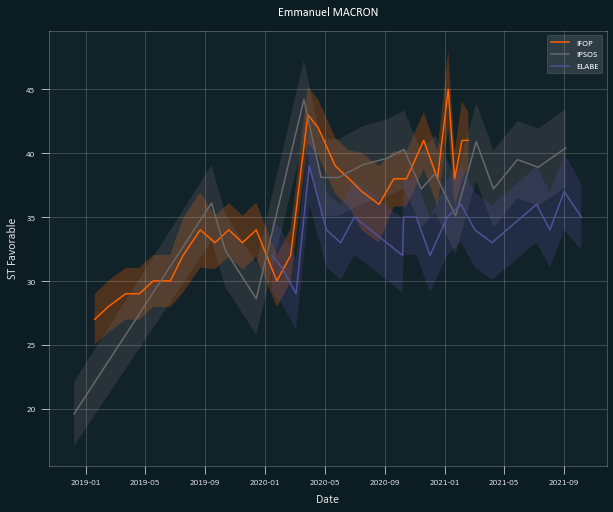

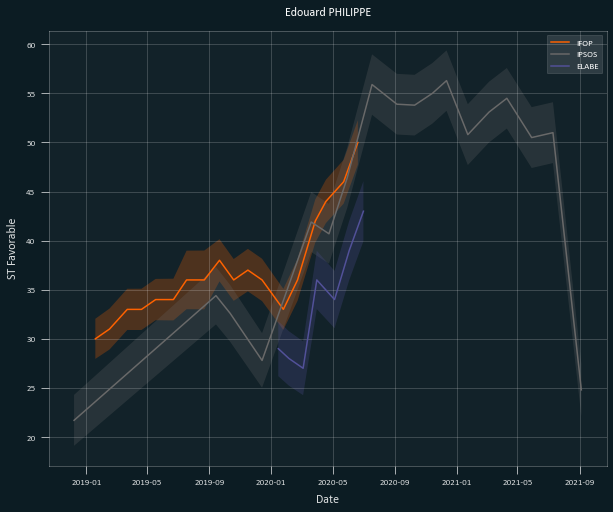

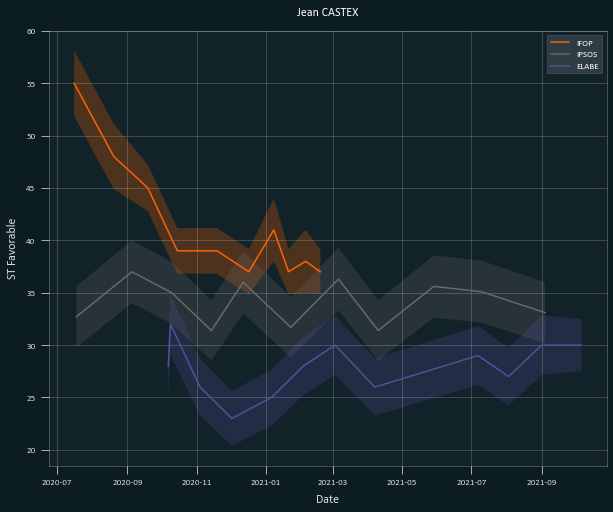

In [90]:
plot_with_error([ifop,ipsos[ipsos.Groupe=='ENSEMBLE'],elabe[elabe.Groupe=='Ensemble']],noms_en_commun,'ST Favorable','Erreur ST Fav',['IFOP','IPSOS','ELABE'])

## Soutien défavorables

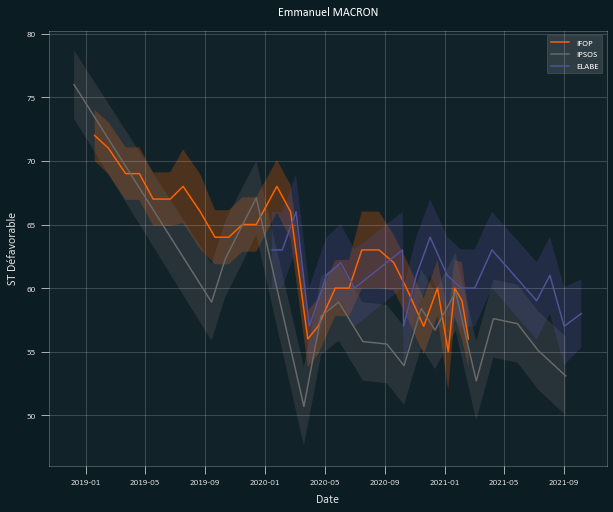

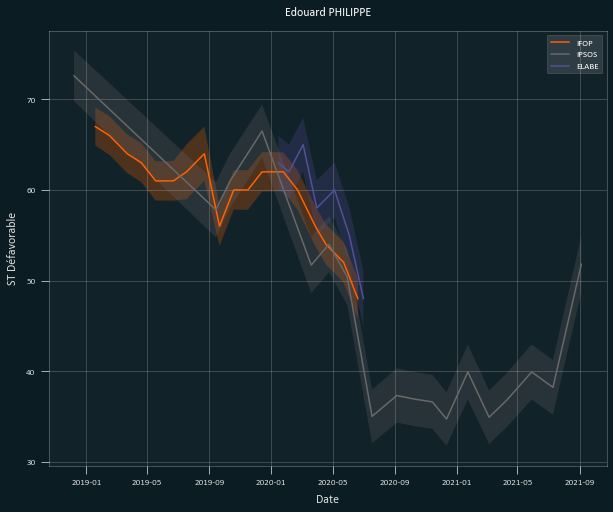

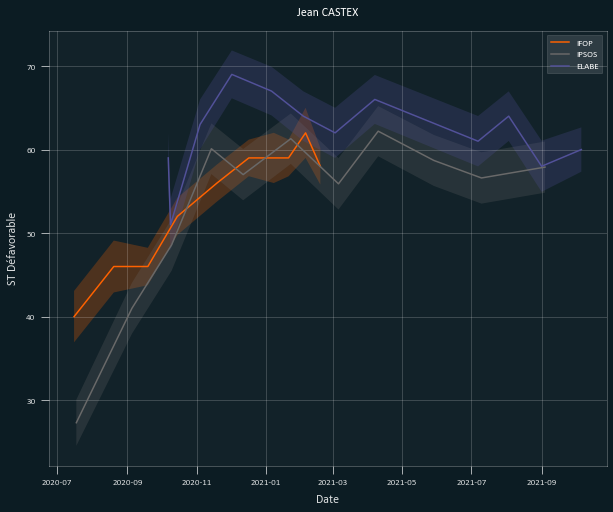

In [91]:
plot_with_error([ifop,ipsos[ipsos.Groupe=='ENSEMBLE'],elabe[elabe.Groupe=='Ensemble']],noms_en_commun,'ST Défavorable','Erreur ST Defav',['IFOP','IPSOS','ELABE'])


## Ne se prononcent pas

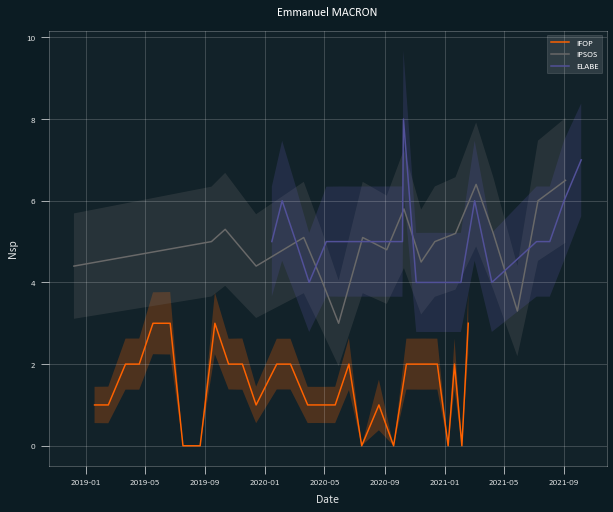

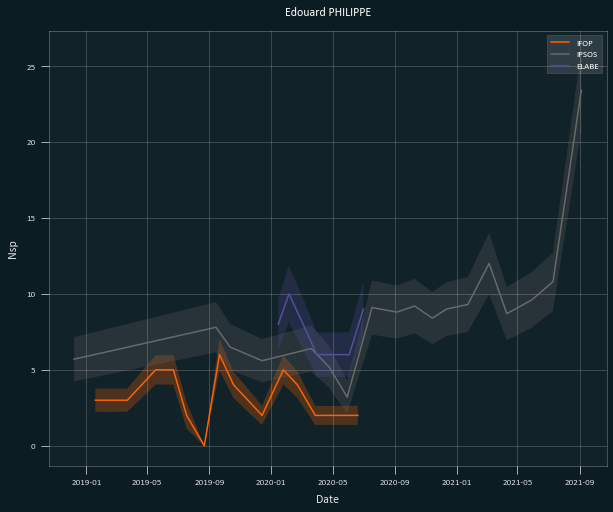

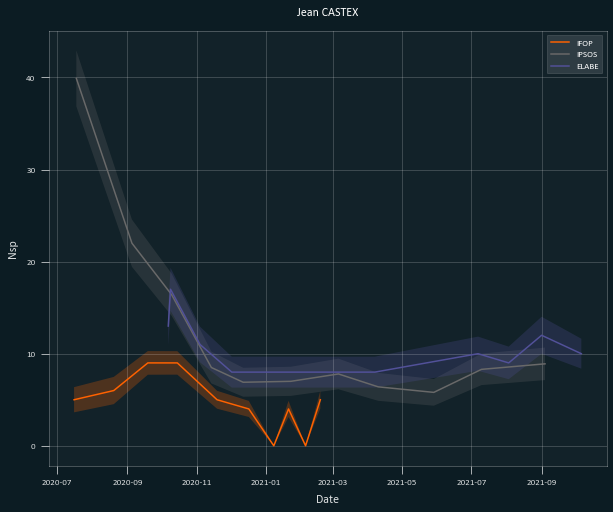

In [92]:
plot_with_error([ifop,ipsos[ipsos.Groupe=='ENSEMBLE'],elabe[elabe.Groupe=='Ensemble']],noms_en_commun,'Nsp','Erreur Nsp',['IFOP','IPSOS','ELABE'])

# Comparaison des scores par personnalité

On utilisera pour cela les mêmes données pour ipsos. Il faut noter la différence de question entre le deux sondages.
* IFOP demande l'opinion du sondés sur chaque personnalité. Le score est la somme des très bonnes opinons et des bonnes opinions.
* IPSOS demande l'opinion sur __l'action__ de la personnalité. Le système de score est la somme des soutiens très favorables et favorables.

Bien que les questions et les réponses sont différentes dans leurs formulations, beaucoup de personnalités non pas d'action particulière qui puisse être connue notoirement. Néanmoins on observe que le nombre de ne se prononce pas est relativement faible malgré cela.

In [93]:
noms_en_commun_pers=[x for x in ifop_pers.Nom.unique() if x in ipsos.Nom.unique()]
noms_en_commun_pers=[x for x in noms_en_commun_pers if x in elabe_pers.Nom.unique()]
noms_en_commun_pers

['Nicolas HULOT',
 'Nicolas SARKOZY',
 'Edouard PHILIPPE',
 'Ségolène ROYAL',
 'François BAROIN',
 'Xavier BERTRAND',
 'François HOLLANDE',
 'Bernard CAZENEUVE',
 'François BAYROU',
 'Anne HIDALGO',
 'Gérard LARCHER',
 'Yannick JADOT',
 'Marlène SCHIAPPA',
 'Jean-Michel BLANQUER',
 'Gérald DARMANIN',
 'François RUFFIN',
 'Cédric VILLANI',
 'Agnès BUZYN',
 'Laurent WAUQUIEZ',
 'Christophe CASTANER',
 'Nicolas DUPONT-AIGNAN',
 'Christian JACOB',
 'Benjamin GRIVEAUX',
 'Olivier FAURE',
 'Bruno RETAILLEAU',
 'Sibeth NDIAYE',
 'Roselyne BACHELOT',
 'Eric DUPOND-MORETTI',
 'Gabriel ATTAL',
 'Barbara POMPILI',
 'Arnaud MONTEBOURG']

C:\Users\Romain\AppData\Local\Temp/ipykernel_24356/602549627.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,8))


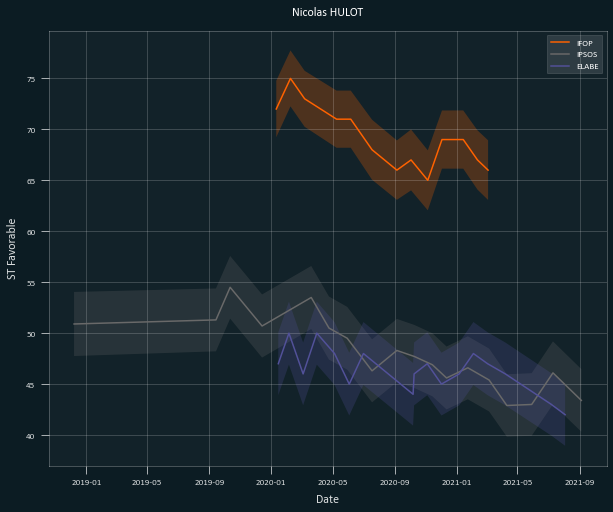

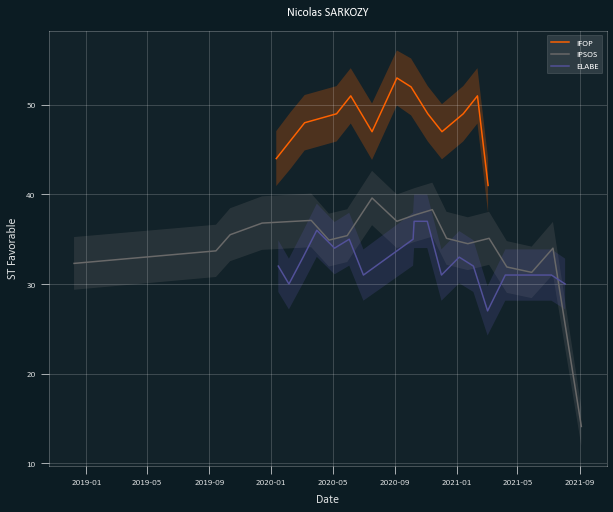

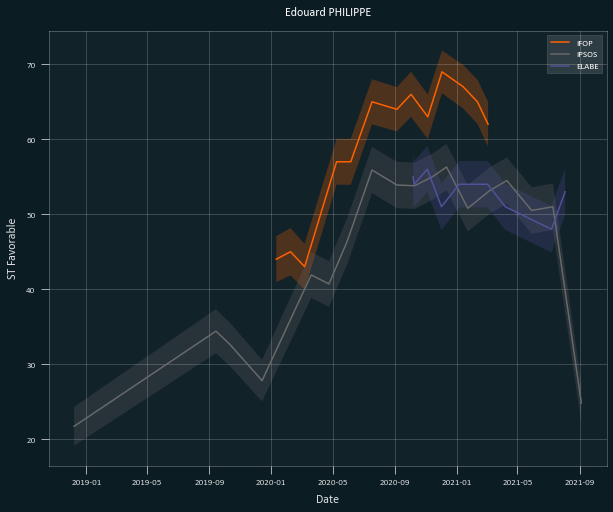

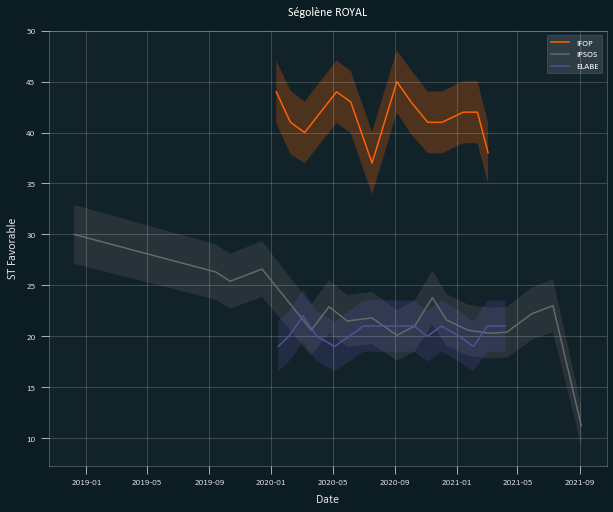

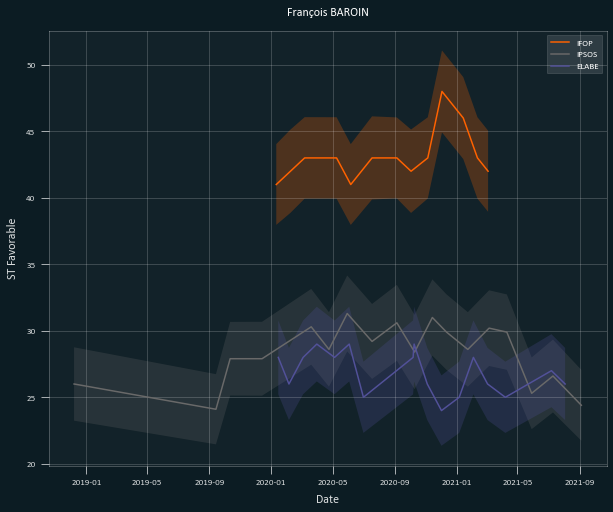

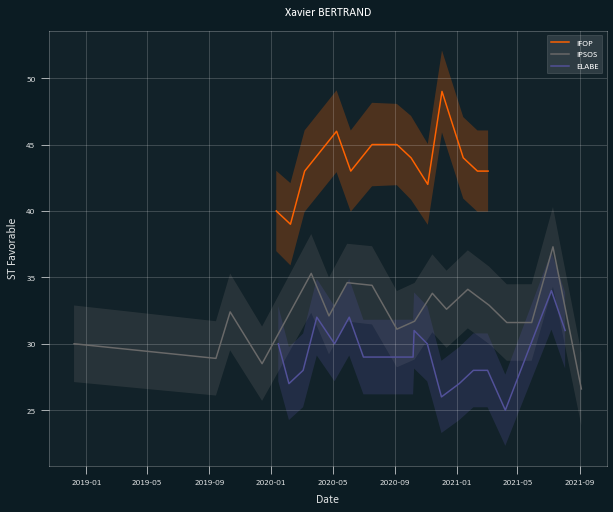

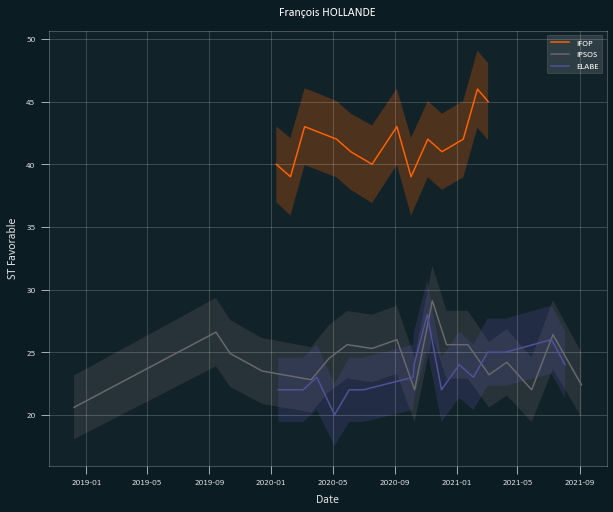

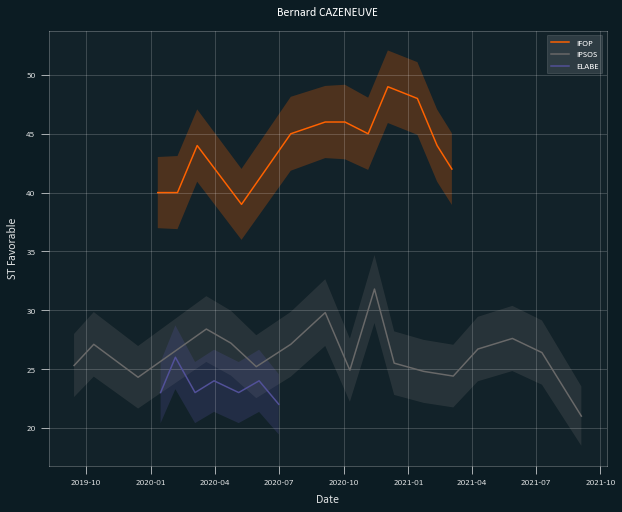

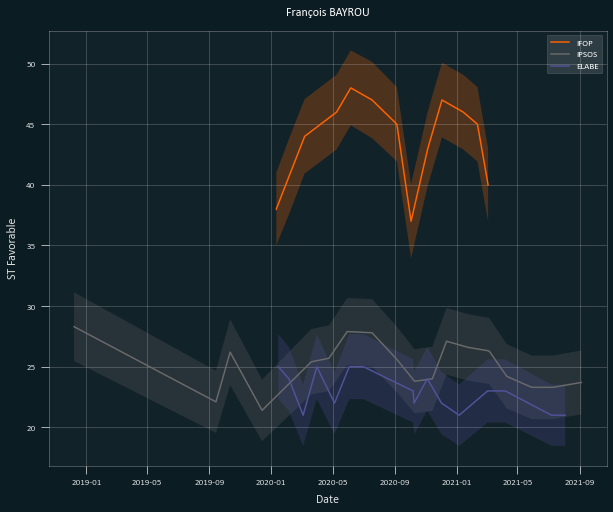

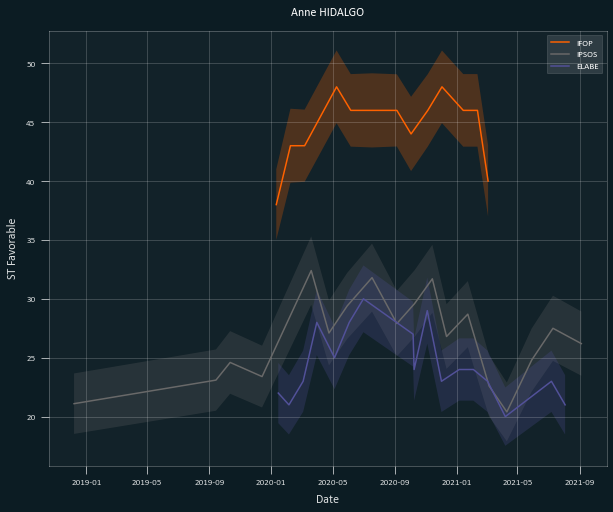

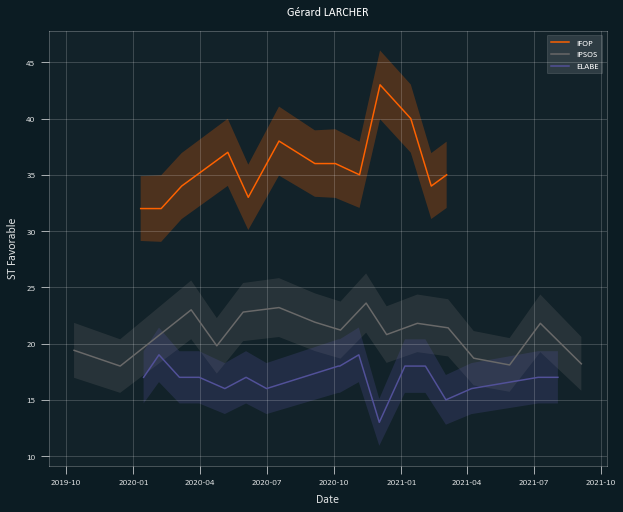

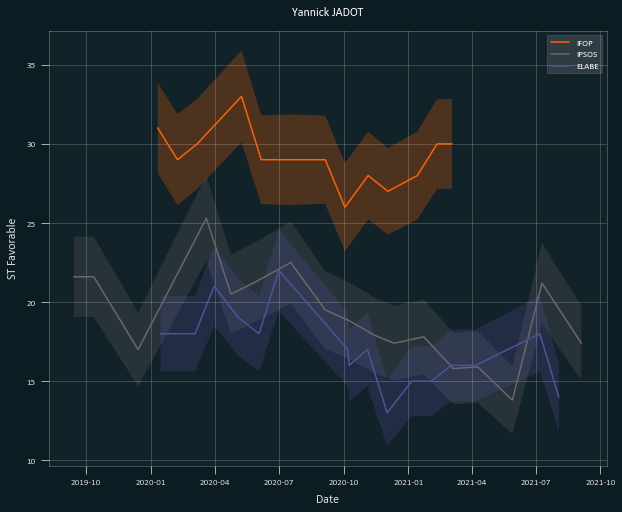

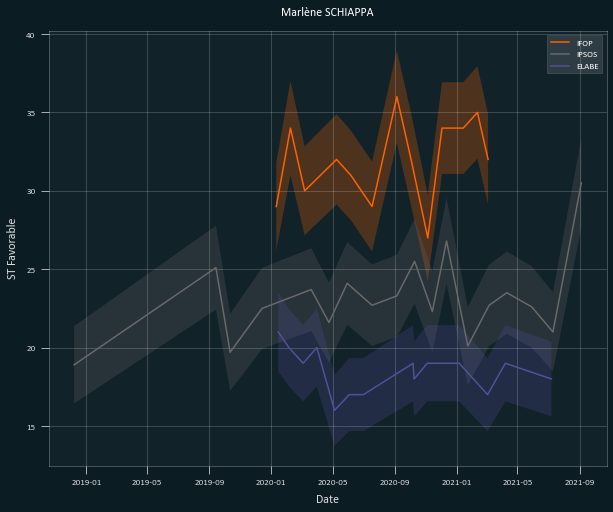

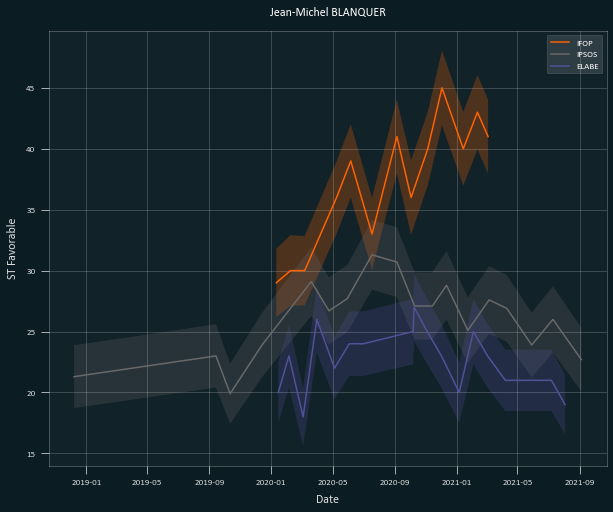

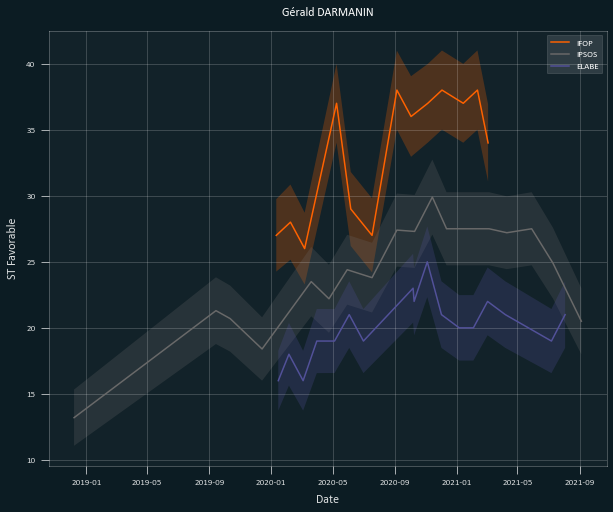

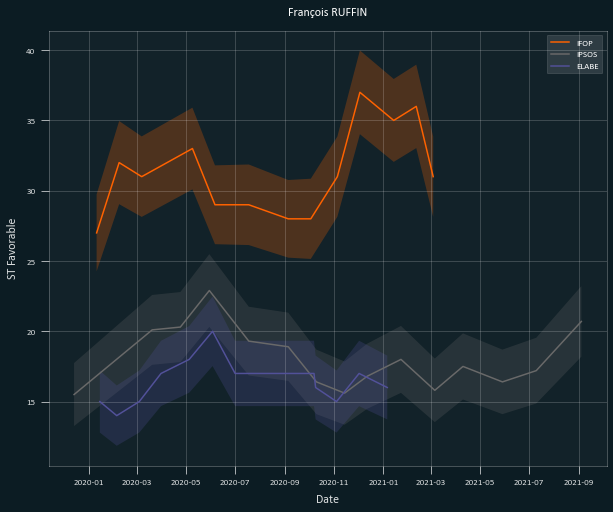

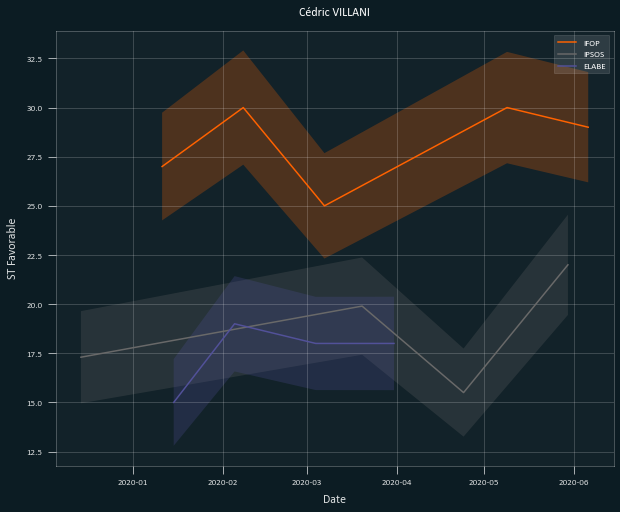

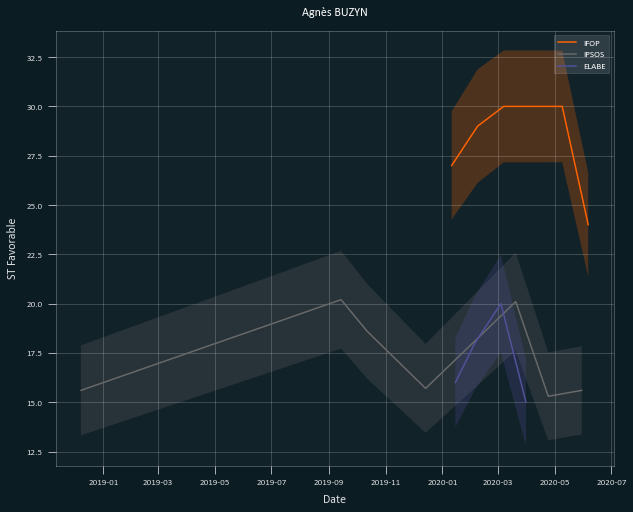

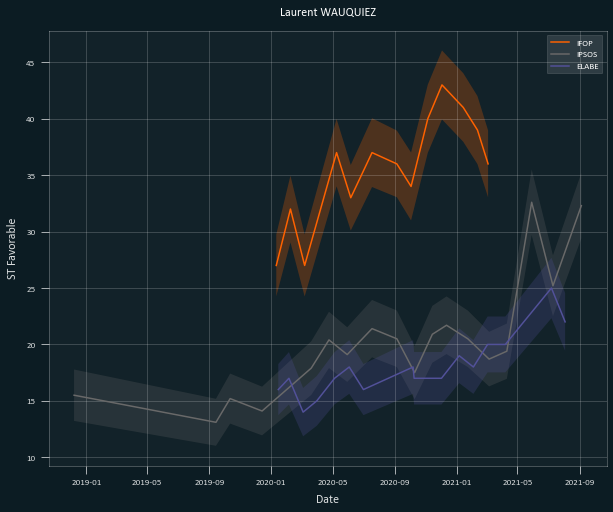

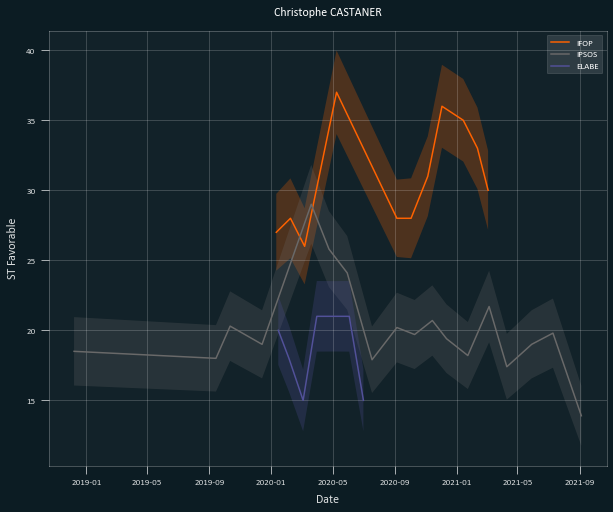

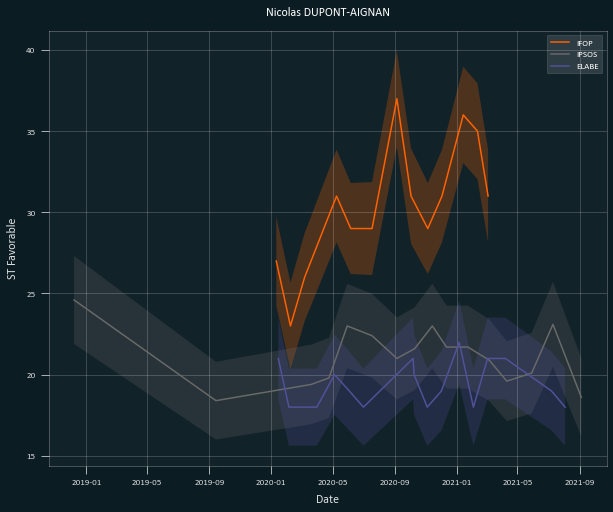

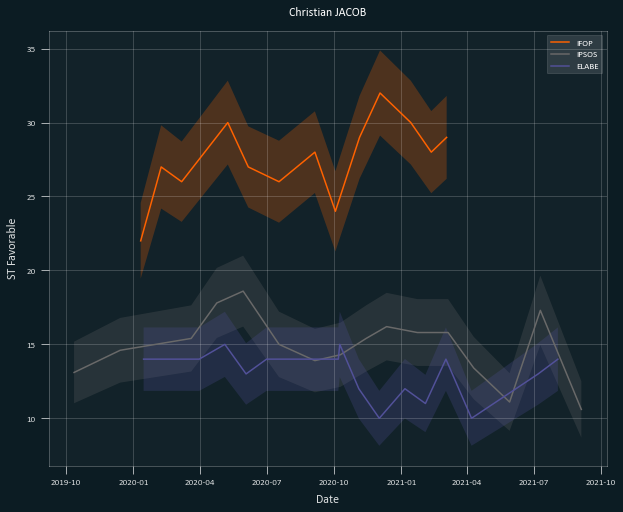

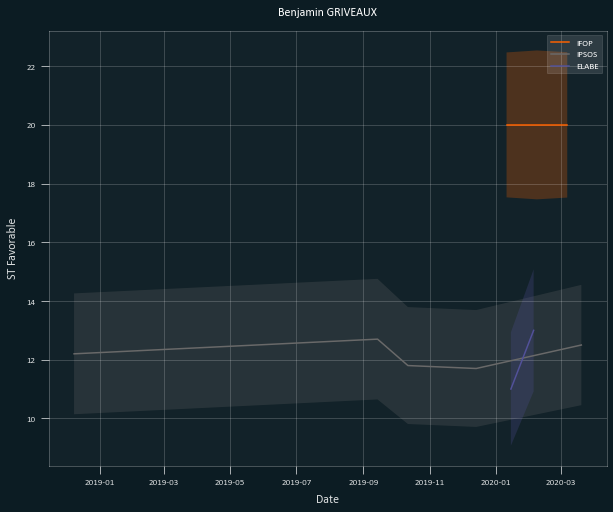

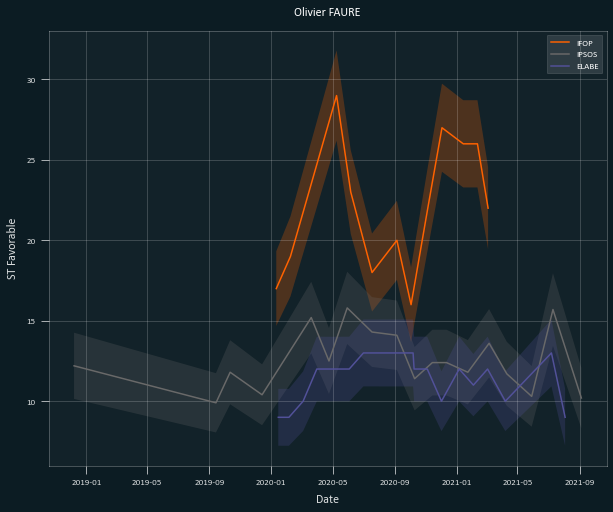

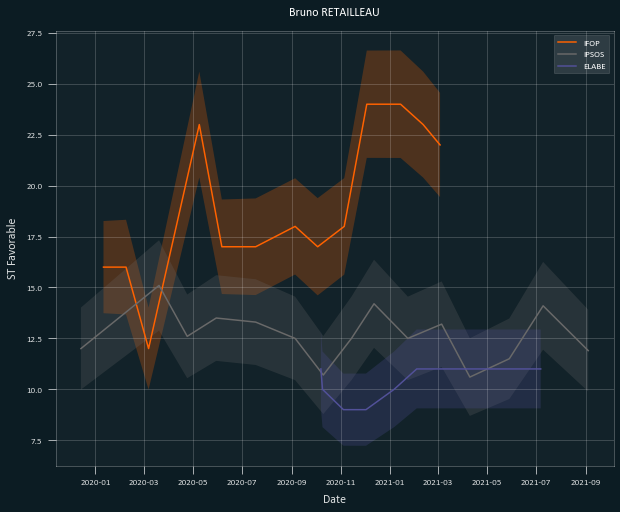

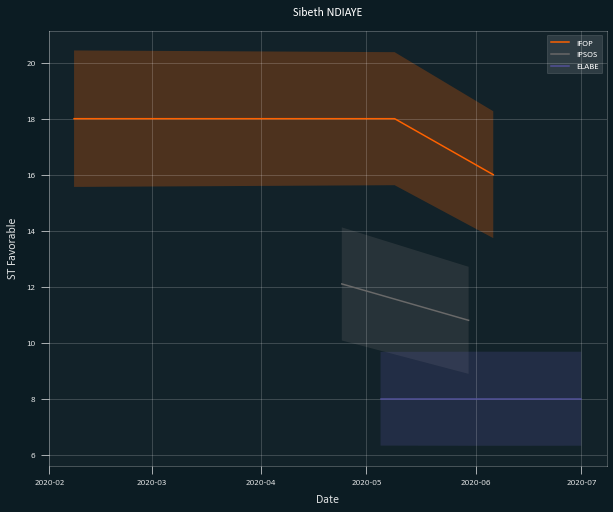

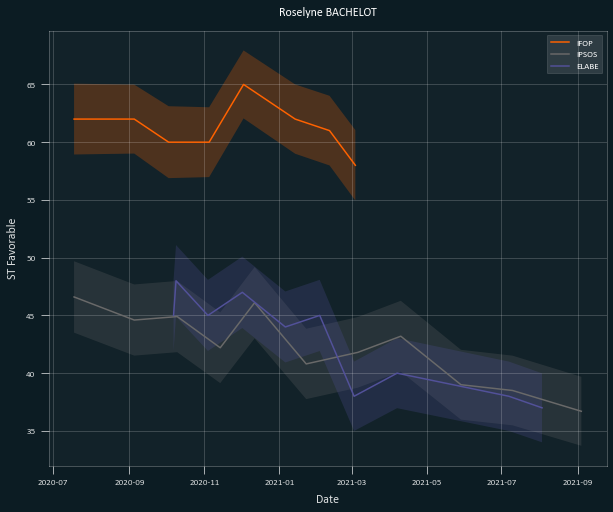

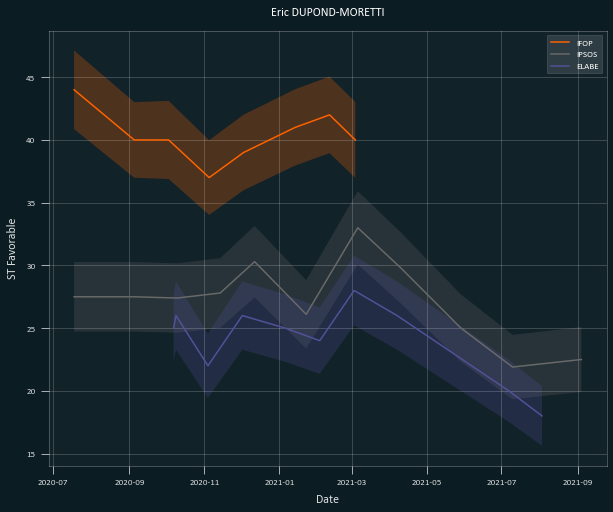

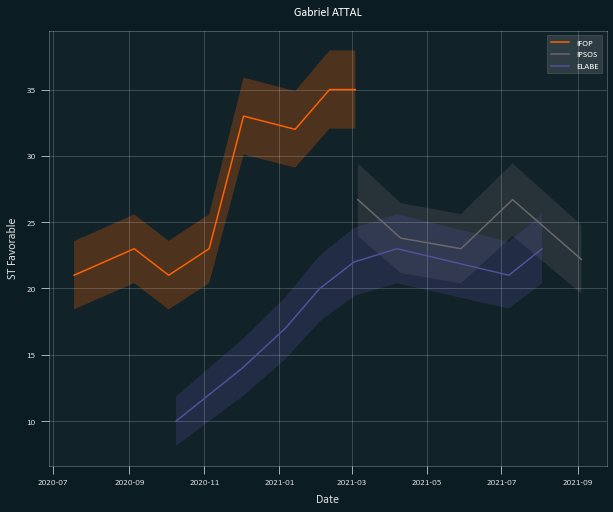

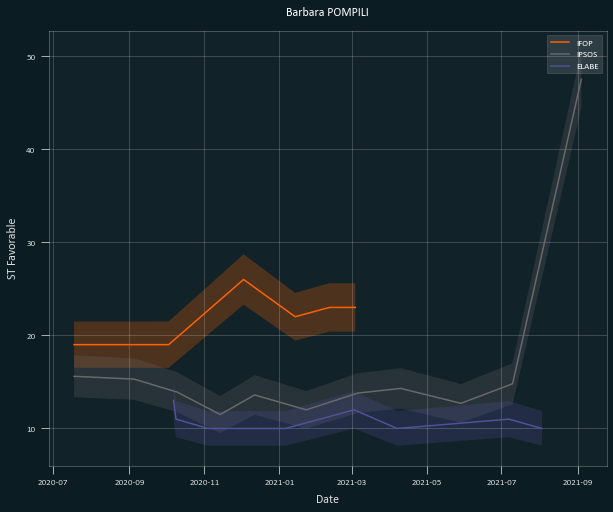

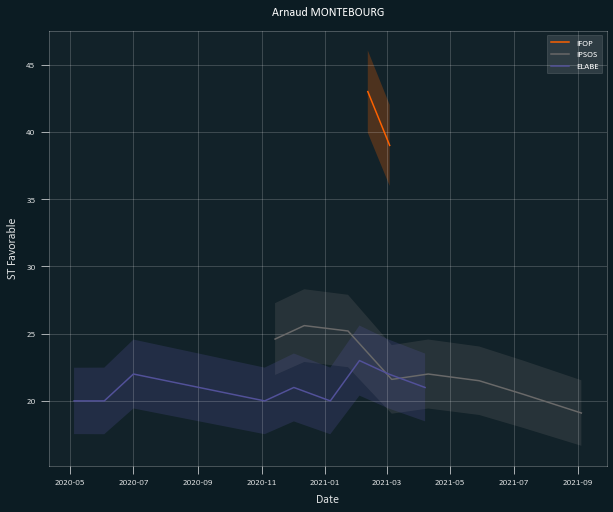

In [94]:
plot_with_error([ifop_pers,ipsos[ipsos.Groupe=='ENSEMBLE'],elabe_pers],noms_en_commun_pers,'ST Favorable','Erreur ST Fav',['IFOP','IPSOS','ELABE'])

# Analyse des populations présidentielles 2017

In [95]:
def base_election_evolution(df,cat,specific_base=''):
    # Compute error relative to base for presidential
    df_base=df[df.Categorie==cat][['Groupe','Base','Date']]
    # Base ensemble
    df_base_ens=df[df.Categorie=='ENSEMBLE'][['Base','Date']].groupby(by=['Date']).mean()
    # Base exprimé
    if specific_base!='':
        df_base_expr=df[(df.Categorie==cat) & (df.Groupe=='STExpr')][['Base','Date']].groupby(by=['Date']).mean()
    # Jointure
    df_base=df_base.join(df_base_ens,on=['Date'],rsuffix='_Ens')
    if specific_base!='':
        df_base=df_base.join(df_base_expr,on=['Date'],rsuffix='_Expr')
    # Drop value
    df_base=df_base[df_base.Groupe !='STExpr']
    df_base=df_base[df_base.Groupe !='STNonexpr']
    # Fusion groupeby (pas de changement de valeur d'ou le mean)
    df_base=df_base.groupby(by=['Date','Groupe']).mean()
    # Pourcentage
    if specific_base!='':
        df_base['Pourcentage']=df_base.Base*100/df_base.Base_Expr
    else:
        df_base['Pourcentage']=df_base.Base*100/df_base.Base_Ens

    return df_base

<AxesSubplot:xlabel='Date', ylabel='Pourcentage'>

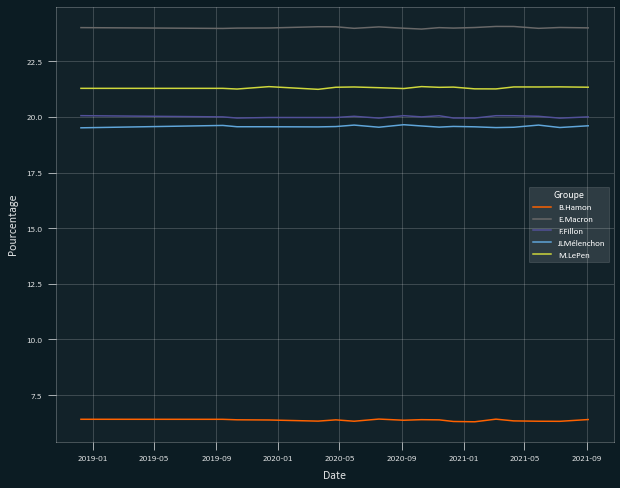

In [96]:
plt.figure(figsize=(10,8))
ipsos_1ertour=base_election_evolution(ipsos,'VotePrésidentielle20171ertour',specific_base='STExpr')
sns.lineplot(data=ipsos_1ertour,x='Date',y='Pourcentage',hue='Groupe')

<AxesSubplot:xlabel='Date', ylabel='Pourcentage'>

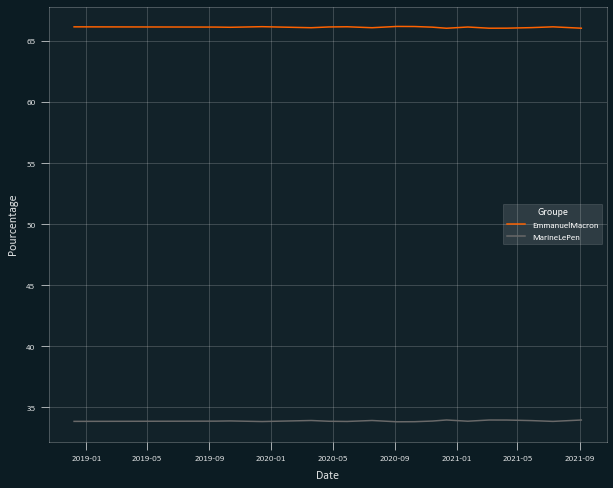

In [97]:
plt.figure(figsize=(10,8))
ipsos_2ndtour=base_election_evolution(ipsos,'VotePrésidentielle20172ndtour',specific_base='STExpr')
sns.lineplot(data=ipsos_2ndtour,x='Date',y='Pourcentage',hue='Groupe')

<AxesSubplot:xlabel='Date', ylabel='Pourcentage'>

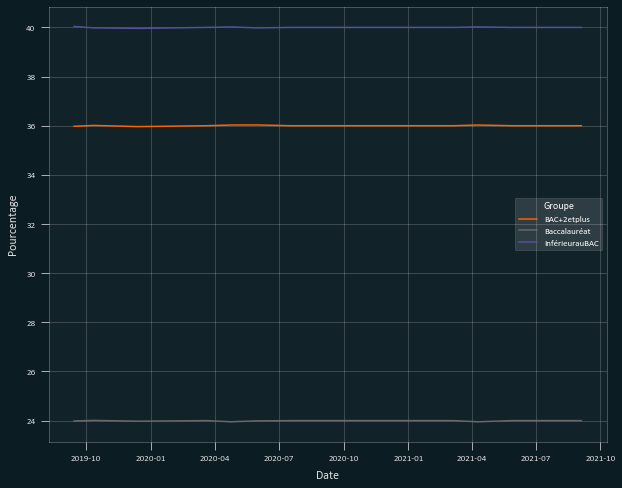

In [98]:
plt.figure(figsize=(10,8))
ipsos_quota=base_election_evolution(ipsos,"Diplômeleplusélevé")
sns.lineplot(data=ipsos_quota,x='Date',y='Pourcentage',hue='Groupe')

In [99]:
ipsos.Categorie.unique()

array(['ENSEMBLE', 'Sexe', 'Age', 'Agriculteurexploitant',
       "PCSdel'individu", 'Région', "Catégoried'agglomération",
       'Revenumensuelnetdufoyer', "Niveaud'études", 'Proximitépolitique',
       'VotePrésidentielle20171ertour', 'VotePrésidentielle20172ndtour',
       'PCSdelapersonnederéférencedufoyer', 'Diplômeleplusélevé'],
      dtype=object)

# Expérimentations


## Interpolation

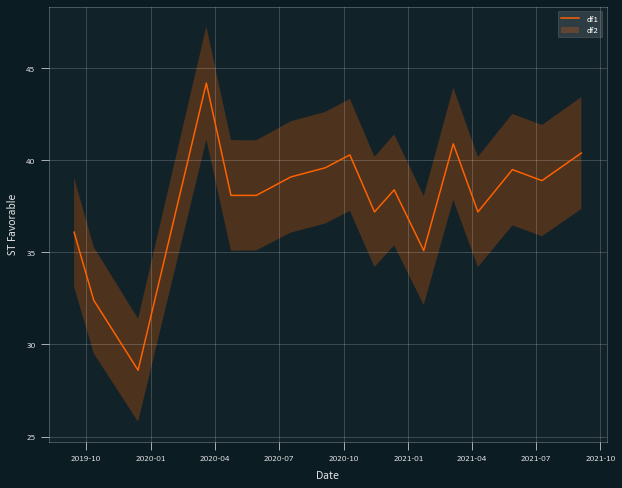

In [100]:
X=ipsos[ipsos.Groupe=='ENSEMBLE']
X=X[X.Date!='2018-12-08']
X=X[X.Nom=="Emmanuel MACRON"]
plot_onedf_with_error(X,['Emmanuel MACRON'],'ST Favorable','Erreur ST Fav')

C:\Users\Romain\AppData\Local\Temp/ipykernel_24356/388009482.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  Xdate=X.Date.astype('int64')


<AxesSubplot:xlabel='Date', ylabel='ST Favorable'>

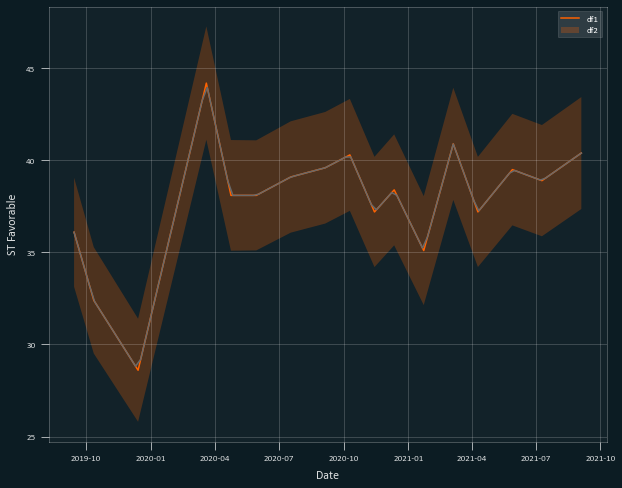

In [101]:
from scipy.interpolate import interp1d
Xdate=X.Date.astype('int64')
f=interp1d( Xdate,X['ST Favorable'], kind='slinear')
xnew=np.linspace(min(Xdate),max(Xdate),100,dtype='int64')
Xnew=pd.to_datetime(xnew,format='%Y-%m-%d')
plot_onedf_with_error(X,['Emmanuel MACRON'],'ST Favorable','Erreur ST Fav')
sns.lineplot(x=Xnew,y=f(xnew))

C:\Users\Romain\AppData\Local\Temp/ipykernel_24356/384317828.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  Xdate=X.Date.astype('int64')


<AxesSubplot:xlabel='Date', ylabel='ST Favorable'>

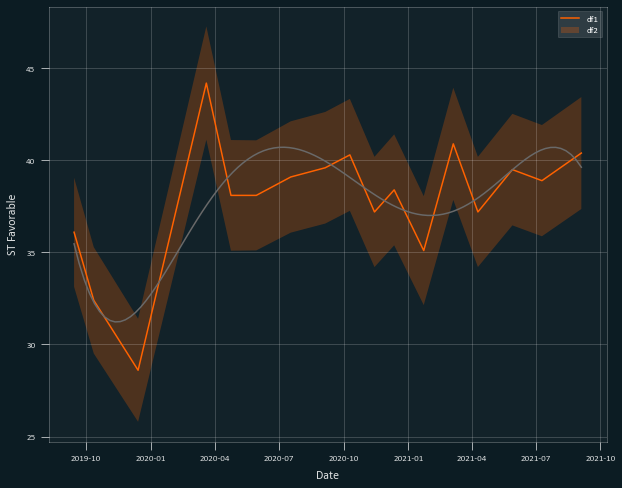

In [102]:
Xdate=X.Date.astype('int64')
p=np.poly1d(np.polyfit(Xdate,X['ST Favorable'],5))
xnew=np.linspace(min(Xdate),max(Xdate),100,dtype='int64')
Xnew=pd.to_datetime(xnew,format='%Y-%m-%d')
plot_onedf_with_error(X,['Emmanuel MACRON'],'ST Favorable','Erreur ST Fav')
sns.lineplot(x=Xnew,y=p(xnew))

<AxesSubplot:xlabel='Date', ylabel='ST Favorable'>

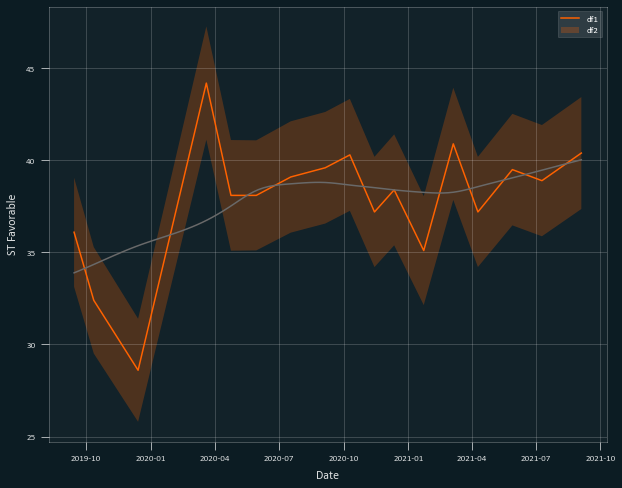

In [103]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z=lowess(X['ST Favorable'],Xdate,frac=0.6,is_sorted=True)
f=interp1d( Xdate,z[:,1], kind='cubic')
xnew=np.linspace(min(Xdate),max(Xdate),100,dtype='int64')
Xnew=pd.to_datetime(xnew,format='%Y-%m-%d')
plot_onedf_with_error(X,['Emmanuel MACRON'],'ST Favorable','Erreur ST Fav')
sns.lineplot(x=Xnew,y=f(xnew))


## Régression linéaire

In [104]:
ipsos.head()


,Nom,Categorie,Groupe,Base,Date,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Erreur ST Fav,Erreur ST Defav,Erreur PDefav,Erreur TDefav,Erreur Nsp
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,971.0,2018-12-08,3.2,16.4,19.6,26.2,49.8,76.0,4.4,-6.4,5.7,2.496908,2.686327,2.765829,3.144945,1.290036
1,Emmanuel MACRON,Sexe,Homme,462.0,2018-12-08,3.0,16.3,19.2,31.9,46.3,78.3,2.5,-12.1,11.4,3.591628,3.758771,4.250147,4.546872,1.423664
2,Emmanuel MACRON,Sexe,Femme,509.0,2018-12-08,3.5,16.5,20.0,20.9,53.0,74.0,6.0,-1.2,0.5,3.475019,3.810656,3.532308,4.335948,2.063178
3,Emmanuel MACRON,Age,18à24ans,103.0,2018-12-08,12.0,18.5,30.5,26.8,32.5,59.3,10.2,-0.3,-5.4,8.891597,9.487723,8.553826,9.045468,5.844882
4,Emmanuel MACRON,Age,25à34ans,154.0,2018-12-08,1.8,11.2,13.1,23.9,57.1,81.0,6.0,-10.1,9.5,5.328945,6.196052,6.735766,7.817041,3.750898


In [105]:
X=np.array([[12,8,25,50,14],
            [45,70,29,23,23],
            [21,5,15,3,12],
            [18,14,27,19,31],
            [4,3,4,5,20],
            [2,0,0,0,2],
            [2,0,0,0,0],
            [7,0,0,0,0],
            [27,1,3,1,10],
            [21,1,1,0,12],
            [18,1,1,2,1],
            [11,85,10,0,15],
            [0,0,2,0,1],
            [2,8,59,0,17],
            [2,1,14,1,7],
            [5,2,9,95,33],
            [2,1,1,1,2]
            ])
y=np.array([20,37,12,23,8,1,1,2,10,8,6,24,0.5,14,4,28,1.5])
# lr=LinearRegression()
# lr.fit(X,y)
# lr.coef_*2550

In [106]:
X=np.array([[82,79,28,0,45],
            [18,21,72,100,55],
            [71,96,53,1,43],
            [29,4,47,99,57],
            [12,8,25,50,14],
            [45,70,29,23,23],
            [21,5,15,3,12],
            [18,14,27,19,31],
            [4,3,4,5,20],
            ])
y=np.array([49,51,53,47,20,37,12,23,8])
lr=LinearRegression()
lr.fit(X,y)
lr.coef_*2550

array([598.25053287, 412.00006853, 441.65438134, 409.17620798,
       698.4853805 ])

In [107]:
np.sum(np.square((X-X.mean(axis=1).reshape(-1,1)))/np.square(X.mean(axis=1).reshape(-1,1)),axis=1)

array([2.20195047, 1.7040251 , 1.78518136, 2.23391267, 2.42572174,
       1.11080332, 1.72831633, 0.40989816, 3.98919753])

In [108]:
lr=LinearRegression(positive=True,normalize=True)
lr.fit(X,y)
lr.coef_*1000

array([234.60805211, 161.56865433, 173.1977966 , 160.46125803,
       273.91583549])